In [1]:
using Phylo
using PhyloPlot
using CairoMakie

path = joinpath("..", "assets")
simple = open(t -> parsenewick(t, NamedPolytomousTree), joinpath(path, "simple.tree"))
complex = open(t -> parsenewick(t, NamedPolytomousTree), joinpath(path, "hummingbirds.tree"))

NamedTree with 126 tips and 1 root. Leaf names are Adelomyia_melanogenys, Aglaiocercus_coelestis, Aglaiocercus_kingi, Chalcostigma_herrani, Oxypogon_guerinii, ... [120 omitted] ... and Florisuga_mellivora

251 nodes: [Adelomyia_melanogenys, Aglaiocercus_coelestis, Aglaiocercus_kingi, Node 4, Node 5 ... 245 missing ... Node 251]

250 branches: [Branch{ManyRoots, String}(56, "Node 59", "Node 53", 0.10359464), Branch{ManyRoots, String}(35, "Node 38", "Node 36", 0.02788159), Branch{ManyRoots, String}(60, "Node 63", "Node 59", 0.02343217), Branch{ManyRoots, String}(220, "Node 223", "Node 222", 0.04006476), Branch{ManyRoots, String}(67, "Node 72", "Heliodoxa_aurescens", 0.11882236) ... 244 missing ... Branch{ManyRoots, String}(65, "Node 71", "Node 69", 0.00427061)]

Node records: "Adelomyia_melanogenys" => Dict{String, Any}() ... "Node 251" => Dict{String, Any}()


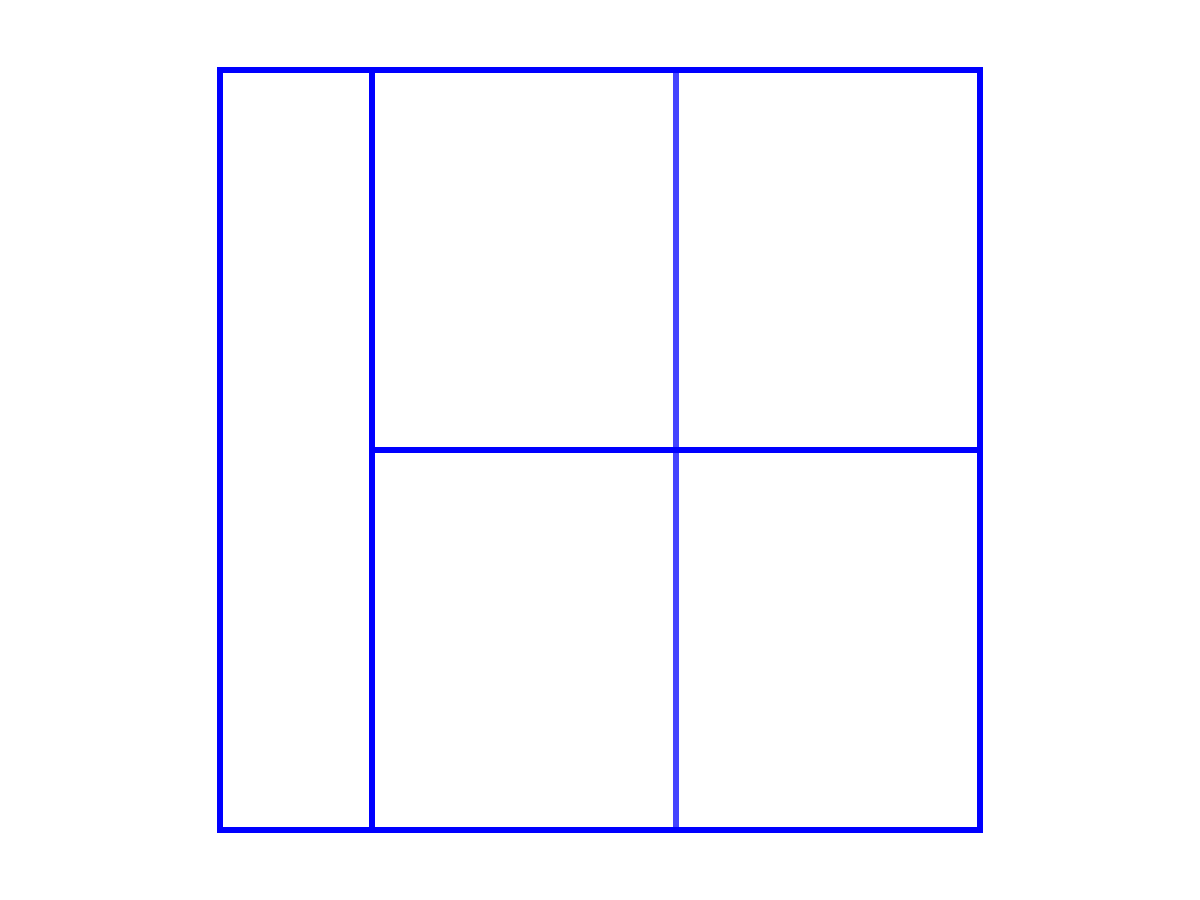

In [2]:
f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)
drawslicedicetreemap(simple)

current_figure()

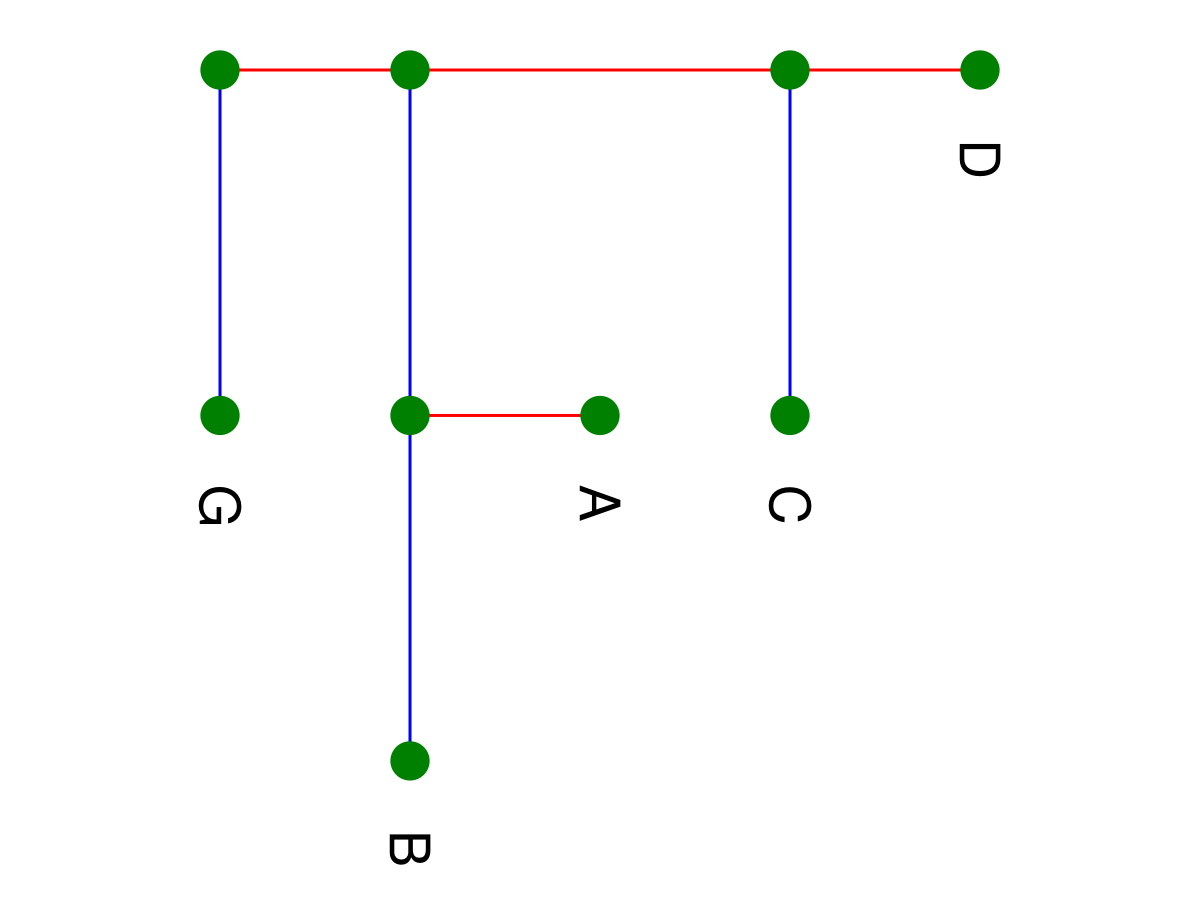

In [85]:
using Phylo

function drawahvtree(tree)
    hvdata = generatehvtree(tree)
    
    for node in getnodes(tree)
        for child in getchildren(tree, node)
            cx, cy = hvdata.coords[child]
            px, py = hvdata.coords[node]
            vx, vy = [cx, cy] - [px, py]
            lcolor = :red
            if vx == 0
                lcolor = :blue
            end
            lines!([cx, px], [-cy, -py]; color=lcolor)
        end
    end

    c = reduce(hcat,values(hvdata.coords))'
    scatter!(c[:,1], -c[:,2],markerspace=:relative,markersize=1/(3*nleaves(tree)), color=:green)

    for leaf in getleaves(tree)
        lx, ly = hvdata.coords[leaf]

        label_name = getnodename(tree, leaf)
        text!(lx, -ly-0.2, text=label_name, align=(:left, :center),fontsize=1/(3*nleaves(tree)),markerspace=:relative,rotation=-pi/2)
    end
end

f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)
drawahvtree(simple)

current_figure()



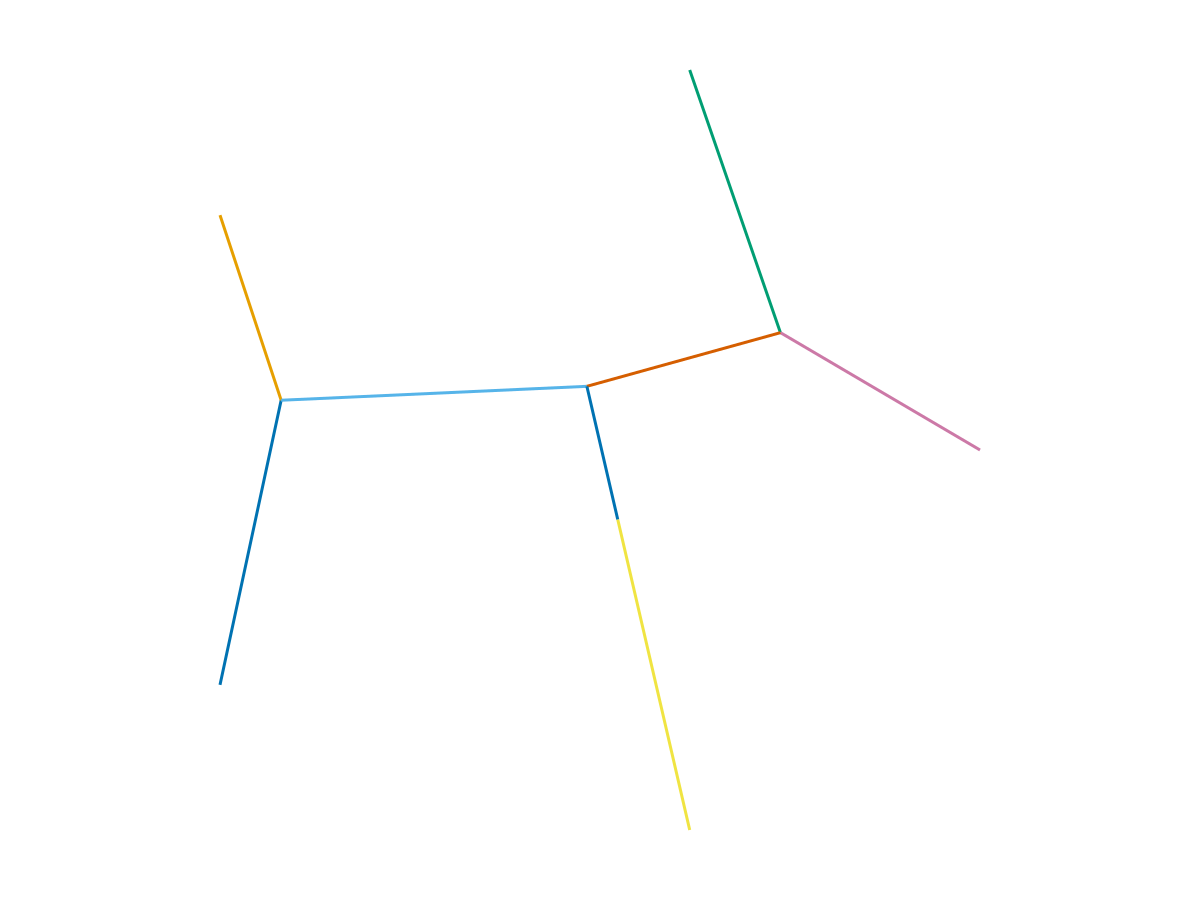

In [4]:
f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)
drawbarycentrictree(simple)

current_figure()

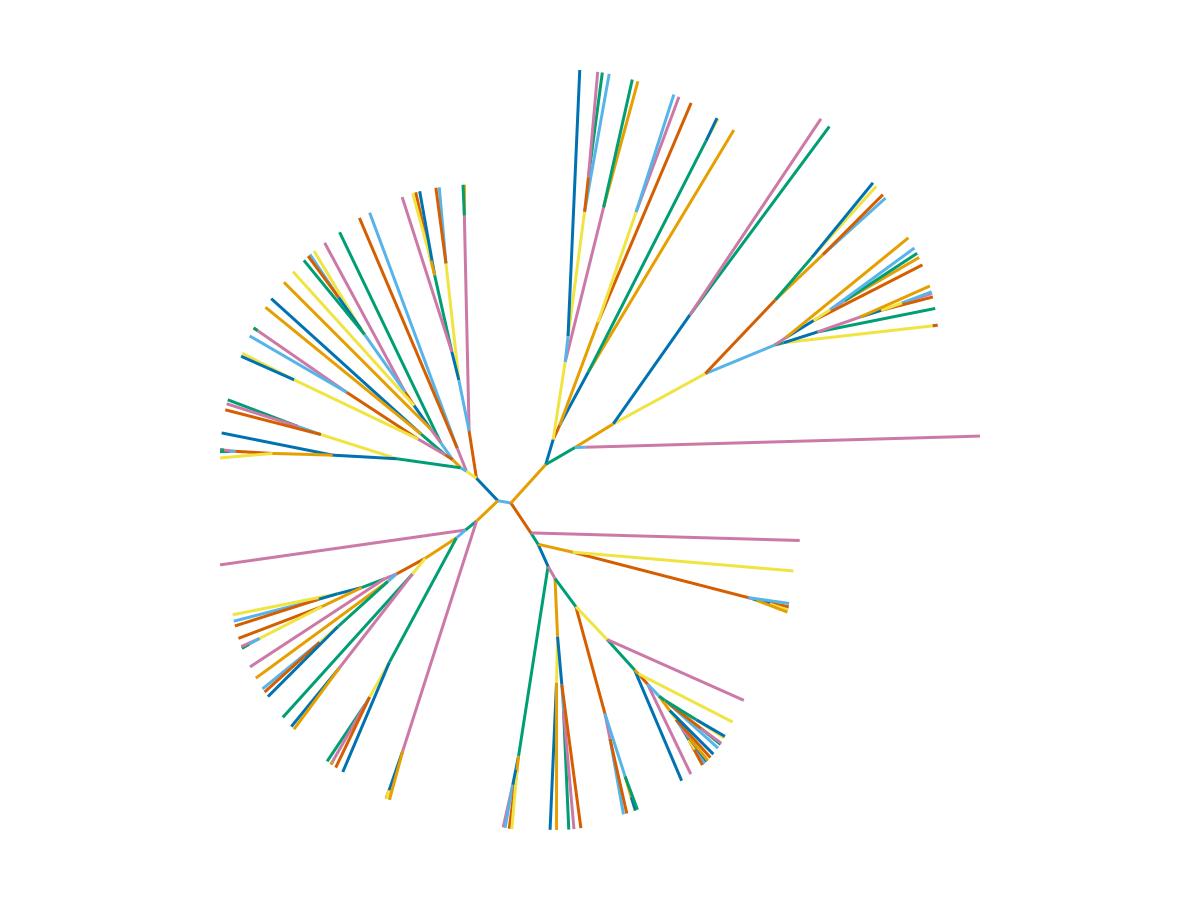

In [5]:
f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)
drawradialtree(complex)

current_figure()

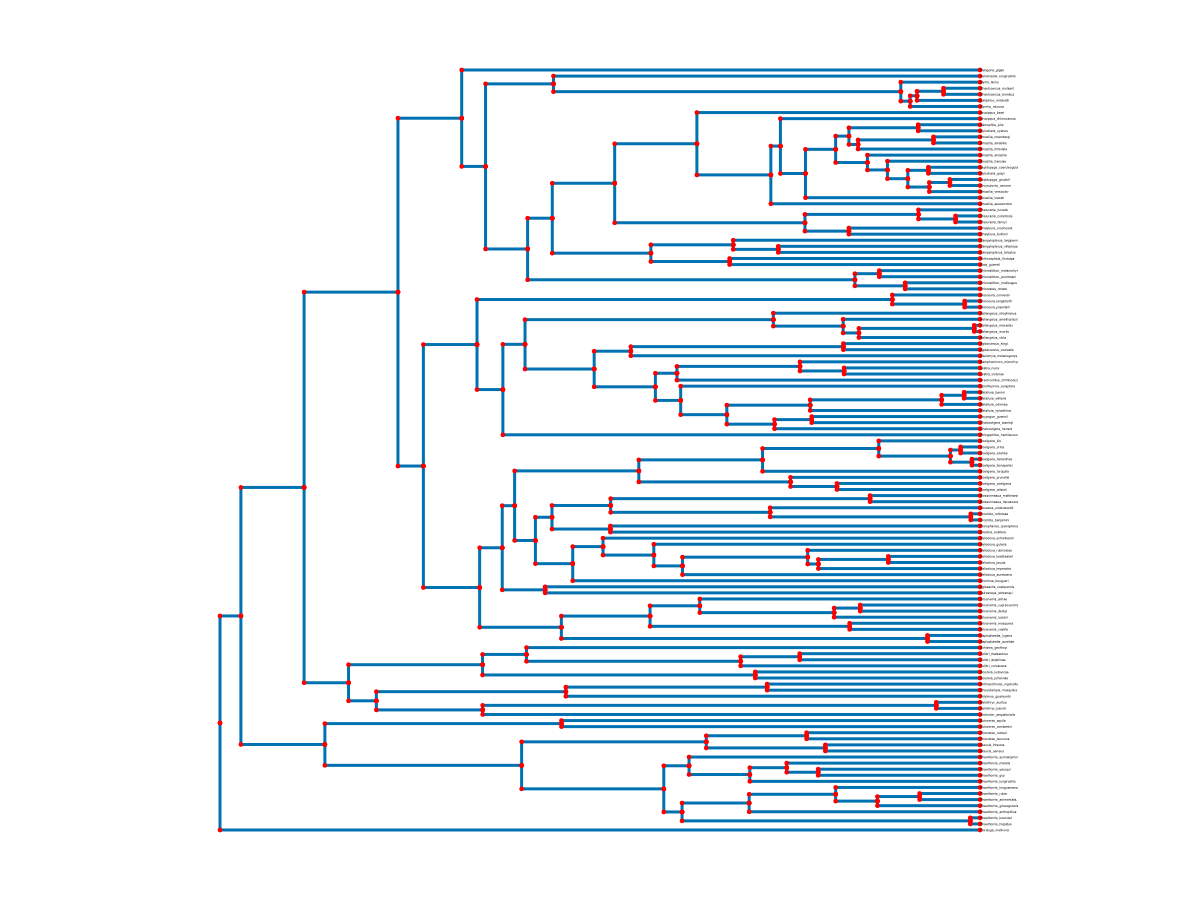

In [60]:
using Phylo

function drawadendrogram(tree; showtips::Bool=false)
    x, y = generatedendrogram(tree)
    lines!(x, y)
    
    d, h, n = Phylo._findxy(tree)

    # draw node markers
    scatter!(x, y,markerspace=:relative,markersize=1/(nleaves(tree)), color=:red)

    # draw leaf labels
    if showtips
        for leaf in getleaves(tree)
            nodename = getnodename(tree, leaf)
            text!(d[leaf], h[leaf], text=nodename, align=(:left, :center),fontsize=1/(2*nleaves(tree)),markerspace=:relative)
        end
    end
    
end

f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)
#drawdendrogram(complex)
drawadendrogram(complex, showtips=true)
current_figure()

In [57]:
function generateradialdendrogram(tree)
    x,y = generatedendrogram(tree)
    adjust(y) = 2pi * y / (nleaves(tree) + 1)

    tx, ty = Phylo._circle_transform_segments(x, adjust(y))
    return tx, ty
end

function drawradialdendrogram(tree; showtips=false)
    x, y = generateradialdendrogram(tree)

    # draw lines
    lines!(x, y)


    d, h, n = Phylo._findxy(tree)
    adjust(y) = 2pi * y / (nleaves(tree) + 1)
    
    markers = [[d[node] adjust(h[node])] for node in n]

    mx = [m[1] for m in markers]
    my = [m[2] for m in markers]

    scatter!(mx.*cos.(my), mx.*sin.(my) ,markerspace=:relative,markersize=1/(nleaves(tree)),color=:tomato)

    # draw leaf labels
    if showtips
        for leaf in getleaves(tree)
            label_name = getnodename(tree, leaf)

            label_distance, label_angle = d[leaf], adjust(h[leaf])
            lx, ly = label_distance*cos(label_angle), label_distance*sin(label_angle)

            text!(lx, ly, text=label_name, align=(:left, :center),fontsize=1/(nleaves(tree)),markerspace=:relative, rotation=label_angle)
        end
    end
    
end

drawradialdendrogram (generic function with 1 method)

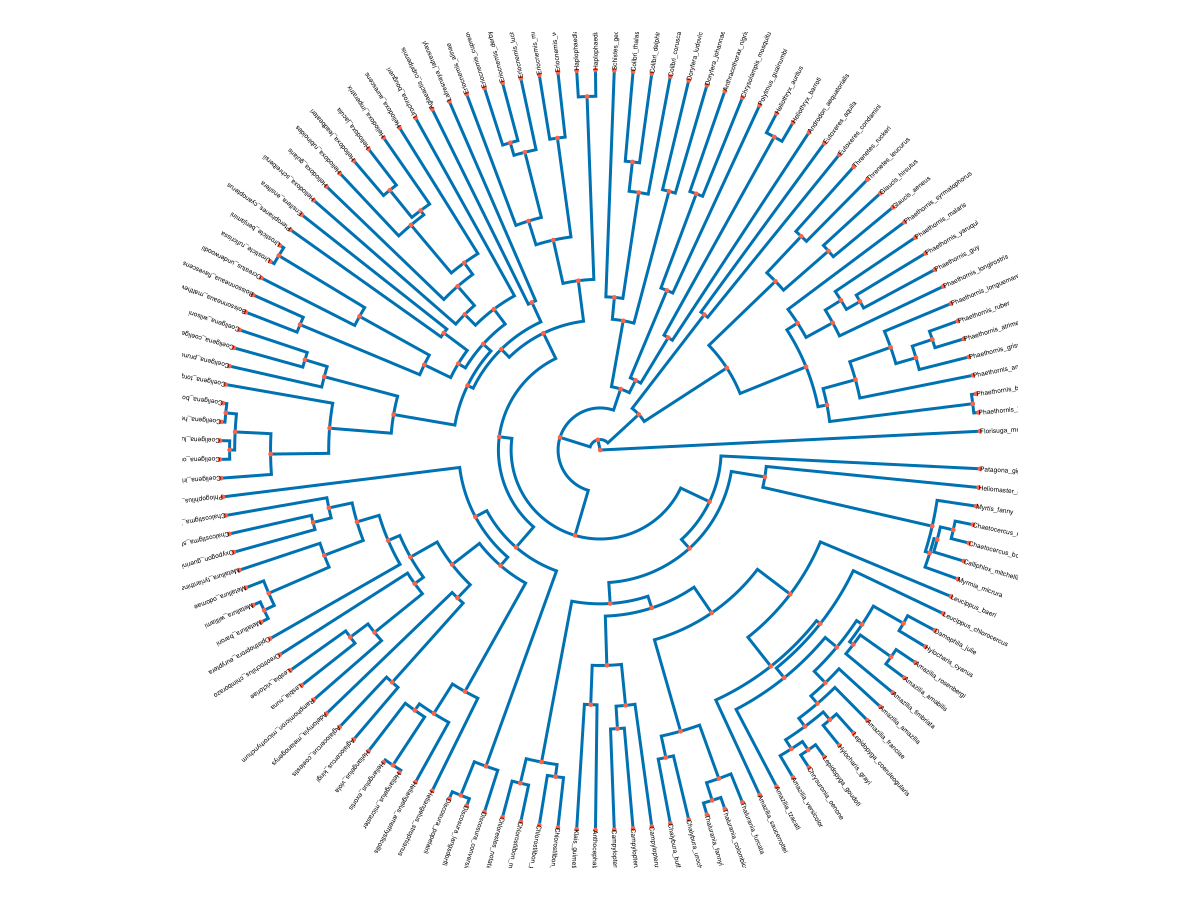

In [58]:
using CairoMakie

f = Figure()
ax = Axis(f[1,1])
ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)

drawradialdendrogram(complex, showtips=true)
current_figure()